In [334]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import linear_model

from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn import svm
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
sc2 = StandardScaler()

In [227]:
''' Data loading & pre-processing '''
data_path = 'owid-covid-data.csv'
data = pandas.read_csv(data_path)

sc1 = StandardScaler()
sc2 = StandardScaler()

# focus on United States
US_data = data[data['location']=='United States']

# focus on daily new cases
US_newcase = US_data.new_cases

#series = {'Date':US.date,'New_Cases':US.new_cases}
series = {'Date':US_data.date,'New_Cases':US_data.new_cases}
df = pd.DataFrame(series).dropna()
df

,Date,New_Cases
126473,2020-01-23,0.0
126474,2020-01-24,1.0
126475,2020-01-25,0.0
126476,2020-01-26,3.0
126477,2020-01-27,0.0
...,...,...
127133,2021-11-13,47499.0
127134,2021-11-14,24810.0
127135,2021-11-15,142099.0
127136,2021-11-16,87481.0


Text(0.5, 1.0, 'New cases versus Time')

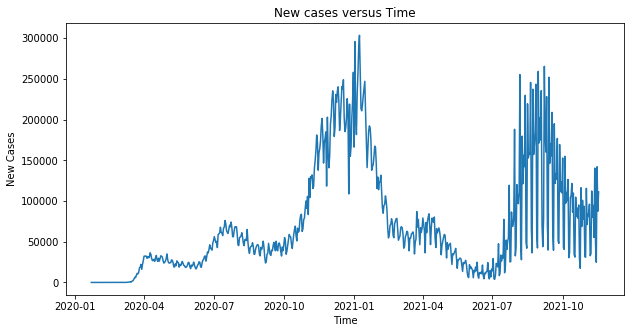

In [233]:
from sklearn.preprocessing import StandardScaler

timeData = df.copy()
timeData.Date = pd.to_datetime(timeData.Date)
timeData = timeData.set_index('Date')

plt.figure(figsize=(10,5))
plt.plot(timeData.New_Cases)

plt.xlabel("Time")
plt.ylabel("New Cases")
plt.title('New cases versus Time')

In [234]:
# focus on time horizon of August to November 2021
temp = (df['Date'] >= '2021-08-15') & (df['Date'] <= '2021-11-15')
data_US = df.loc[temp]
data_US.reset_index(drop=True, inplace=True)
data_US

,Date,New_Cases
0,2021-08-15,42065.0
1,2021-08-16,219428.0
2,2021-08-17,152800.0
3,2021-08-18,158599.0
4,2021-08-19,157216.0
...,...,...
88,2021-11-11,55314.0
89,2021-11-12,140400.0
90,2021-11-13,47499.0
91,2021-11-14,24810.0


In [235]:
vec = []
for i in range(len(data_US)):
    vec.append(i+1)
data_US.loc[:,'Days'] = vec

C:\Users\16348\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\16348\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [293]:
''' Machine Learning Methods (1/3): Linear Regression '''
### Linear Regression
def apply_LR(data_US):
    #cross validation 
    kf = KFold(n_splits=5,shuffle = True)
    MSE=[]
    for tr, te in kf.split(data_US):
        test = data_US.iloc[te,:]
        train = data_US.iloc[tr,:]
         #we need to normalize the depedent variable, otherwise the error would be too large since we're dealing with numbers in 4 digits here
        x_train = np.array(train["Days"]).reshape(-1, 1)
        y_train = np.array(train["New_Cases"]).reshape(-1,1)
        x_train = sc1.fit_transform(x_train)
        y_train = sc2.fit_transform(y_train)
        x_test = np.array(test["Days"]).reshape(-1, 1)
        y_test = np.array(test["New_Cases"]).reshape(-1,1)
        x_test = sc1.transform(x_test)
        y_test = sc2.transform(y_test)
        LR = linear_model.LinearRegression()
        LR.fit(x_train,y_train)
        pred = LR.predict(x_test)
        mse = mean_squared_error(y_test,pred)
        MSE.append(mse)
    miu = np.mean(MSE)   
    return miu

In [343]:
''' Machine Learning Methods (1/3): Linear Regression '''
### Linear Regression
def apply_LR(data_US):
    #cross validation 
    kf = KFold(n_splits=5,shuffle = False)
    MSE=[]
    for tr, te in kf.split(data_US):
        test = data_US.iloc[te,:]
        train = data_US.iloc[tr,:]
        x_train = np.array(train["Days"]).reshape(-1, 1)
        y_train = np.array(train["New_Cases"]).reshape(-1,1)
        x_test = np.array(test["Days"]).reshape(-1, 1)
        y_test = np.array(test["New_Cases"]).reshape(-1,1)
        LR = linear_model.LinearRegression()
        LR.fit(x_train,y_train)
        pred = LR.predict(x_test)
        mse = mean_squared_error(y_test,pred)
        MSE.append(mse)
        
    plt.plot(range(len(x_test)),y_test)
    plt.plot(range(len(x_test)),pred)
    plt.show()
    
    miu = np.mean(MSE)   
    return miu

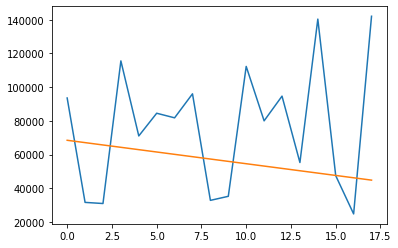

AIC: 201.059


In [344]:
num_para = 2
aic = len(y_test) * np.log(apply_LR(data_US)) + 2 * num_para
print('AIC: %.3f' % aic)